In [2]:
from encephalon import *
from axon import *
import numpy as np
import json
%matplotlib qt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

In [ ]:
ser = serial_innit()

0 - /dev/ttyACM0 - ttyACM0


In [ ]:
model = NN([2,1,1],ser)

In [ ]:
print(model.W)
print(model.b)

{1: array([[ 0.05371374],
       [-1.05379819]]), 2: array([[-0.16237707]])}
{1: array([[0.]]), 2: array([[0.]])}


In [ ]:
model.W = {1: np.array([[ 1.0],[1.1]]), 2: np.array([[2]])}
model.b = {1: np.array([[0.]]), 2: np.array([[0.]])}

In [ ]:
NN.set_weights_and_biases(model)

In [ ]:
for _ in range(6):
    print(serial_read(ser,1))


Weights and biases updated.






In [ ]:
# serial_monitor(ser)

In [ ]:
# print(serial_write_and_await(ser, "SET I0 2.5"))

In [ ]:
# print(serial_write_and_await(ser, "READ O0"))

[[0.0, 0.0, 0.034213, 0.039101, 2.517107, 2.077224, -1, 4.985337], [0.0, 1.0, 0.029326, 1.021505, 2.517107, 2.179863, -1, 4.985337], [0.0, 2.0, 0.034213, 2.018573, 2.517107, 2.209189, -1, 4.98045], [0.0, 3.0, 0.034213, 3.010753, 2.517107, 2.189638, -1, 4.98045], [0.0, 4.0, 0.034213, 4.002933, 2.517107, 2.194526, -1, 4.985337], [0.0, 5.0, 0.034213, 4.98045, 2.517107, 2.214076, -1, 4.985337], [1.0, 0.0, 1.021505, 0.034213, 2.517107, 2.204301, -1, 4.985337], [1.0, 1.0, 1.021505, 1.021505, 2.517107, 2.209189, -1, 4.985337], [1.0, 2.0, 1.021505, 2.018573, 2.517107, 2.204301, -1, 4.98045], [1.0, 3.0, 1.021505, 3.010753, 2.517107, 2.184751, -1, 4.985337], [1.0, 4.0, 1.021505, 4.002933, 2.517107, 2.204301, -1, 4.985337], [1.0, 5.0, 1.016618, 4.98045, 2.517107, 2.218964, -1, 4.985337], [2.0, 0.0, 2.018573, 0.039101, 2.512219, 2.194526, -1, 4.98045], [2.0, 1.0, 2.018573, 1.021505, 2.517107, 2.184751, -1, 4.98045], [2.0, 2.0, 2.013685, 2.018573, 2.517107, 2.189638, -1, 4.975562], [2.0, 3.0, 2.013

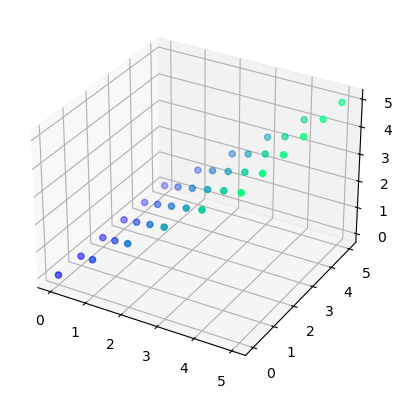

In [ ]:
points = []
for x in np.linspace(0, 5, 6):
    for y in np.linspace(0, 5, 6):
        z = model.use([x,y],10)
        points.append([x, y] + z)
print(points)
points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()